In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

import IPython.display
import cmocean as cm
import cartopy.crs as ccrs

In [2]:
import cosima_cookbook as cc

In [3]:
session = cc.database.create_session()

In [4]:
cc.querying.get_experiments(session)

,experiment,ncfiles
0,01deg_jra55v13_ryf9091_OFAM3visc,50
1,01deg_jra55v13_ryf9091_tides_fixed,1823
2,01deg_jra55v13_ryf9091_k_smag_iso3,128
3,01deg_jra55v13_ryf9091_5Kv,102
4,1deg_jra55v131_ryf_nonuniform_albedo,260
5,01deg_jra55v13_ryf9091_tides_control,620
6,1deg_jra55v131_ryf_const_albedo,260
7,01deg_jra55v13_ryf9091_tides,2578
8,025deg_jra55_ryf9091_gadi_noGM,316
9,1deg_jra55_iaf_v2.0.0rc3_nonuniform_albedo,4660


In [5]:
cc.querying.get_variables(session, experiment='025deg_jra55_ryf9091_gadi', frequency='1 monthly')

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
0,ANGLE,angle grid makes with latitude line on U grid,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
1,ANGLET,angle grid makes with latitude line on T grid,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
2,HTE,T cell width on East side,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
3,HTN,T cell width on North side,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
4,NCAT,category maximum thickness,1 monthly,output299/ice/OUTPUT/iceh.2499-12.nc,7176,1900-01-01 00:00:00,2500-01-01 00:00:00
...,...,...,...,...,...,...,...
159,wt,dia-surface velocity T-points,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
160,xt_ocean,tcell longitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00
161,xu_ocean,ucell longitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00
162,yt_ocean,tcell latitude,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00


In [6]:
expt = '025deg_jra55_ryf9091_gadi'
vars_025deg = cc.querying.get_variables(session, experiment='025deg_jra55_ryf9091_gadi')
vars_025deg[vars_025deg['name'].str.lower().str.match('eta')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
27,eta_nonbouss,eta_nonbouss,None,restart200/ocean/ocean_barotropic.res.nc,12,None,None
28,eta_t,eta_t,None,restart200/ocean/ocean_barotropic.res.nc,12,None,None
29,eta_t_bar,eta_t_bar,None,restart200/ocean/ocean_barotropic.res.nc,12,None,None
30,eta_u,eta_u,None,restart200/ocean/ocean_barotropic.res.nc,12,None,None
172,eta_global,global ave eta_t plus patm_t/(g*rho0),1 monthly,output299/ocean/ocean_scalar.nc,300,1900-01-01 00:00:00,2500-01-01 00:00:00
173,eta_t,surface height on T cells [Boussinesq (volume ...,1 monthly,output299/ocean/ocean.nc,302,1900-01-01 00:00:00,2500-01-01 00:00:00


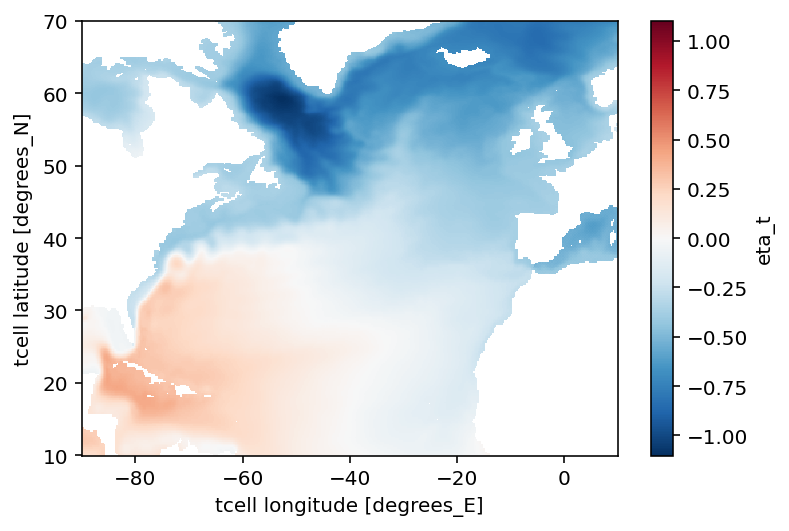

In [7]:
expt = '025deg_jra55_ryf9091_gadi'
variable = 'eta_t'
eta_t = cc.querying.getvar(expt,variable,session,
                            start_time='2000-01-01',
                            end_time='2000-12-31').sel(yt_ocean=slice(10,70)).sel(xt_ocean=slice(-90,10))
eta_t = eta_t.mean('time')
eta_t.plot();

In [8]:
r0 = 6.371 * 10**6
Gradx_eta = eta_t.differentiate('xt_ocean')*(180/np.pi)/(r0*np.cos((eta_t.yt_ocean*np.pi)/180))
Grady_eta = eta_t.differentiate('yt_ocean')*(180/np.pi)/r0

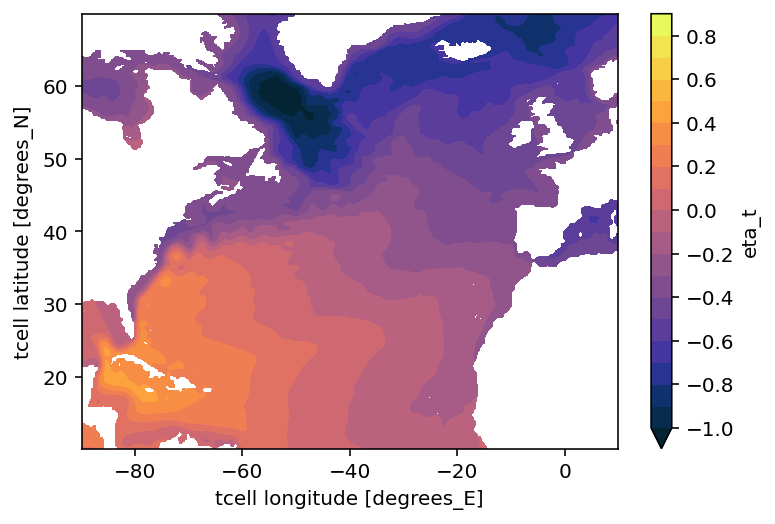

In [9]:
eta_t.plot.contourf(levels=np.arange(-1,1,0.1), cmap=cm.cm.thermal);

In [10]:
vars_025deg = cc.querying.get_variables(session, experiment='025deg_jra55_ryf9091_gadi')
vars_025deg[vars_025deg['name'].str.lower().str.match('pot')]

,name,long_name,frequency,ncfile,# ncfiles,time_start,time_end
56,pot_temp,pot_temp,None,restart200/ocean/ocean_pot_temp.res.nc,12,None,None
212,pot_rho_0,potential density referenced to 0 dbar,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
213,potrho,potential density,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
214,potrho_edges,potential density edges,1 monthly,output299/ocean/ocean.nc,102,1900-01-01 00:00:00,2500-01-01 00:00:00
307,pot_rho_0,potential density referenced to 0 dbar,1 yearly,output199/ocean/ocean.nc,198,1904-01-01 00:00:00,2300-01-01 00:00:00
308,pot_temp,Potential temperature,1 yearly,output199/ocean/ocean.nc,198,1904-01-01 00:00:00,2300-01-01 00:00:00
309,potrho,potential density,1 yearly,output199/ocean/ocean.nc,198,1904-01-01 00:00:00,2300-01-01 00:00:00
310,potrho_edges,potential density edges,1 yearly,output199/ocean/ocean.nc,198,1904-01-01 00:00:00,2300-01-01 00:00:00


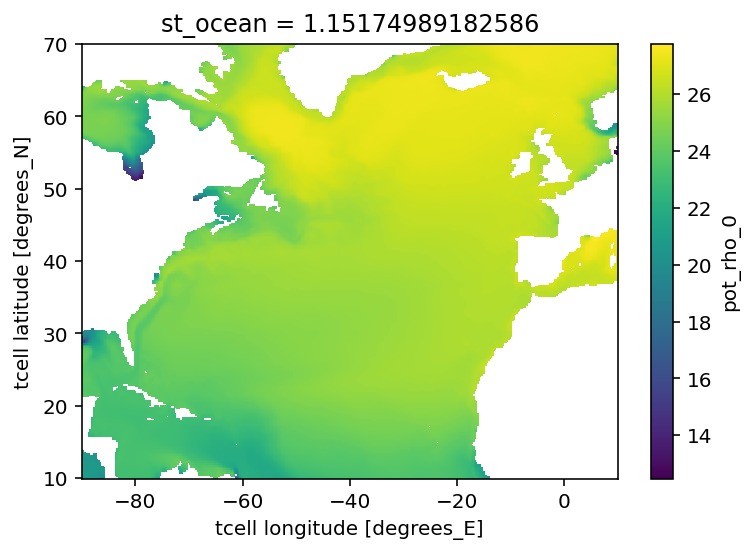

In [11]:
variable = 'pot_rho_0'
potrho = cc.querying.getvar(expt,variable,session,
                            start_time='2000-01-01',
                            end_time='2000-12-31').sel(yt_ocean=slice(10,70)).sel(xt_ocean=slice(-90,10)).sel(st_ocean = 1,method = 'nearest')
potrho = (potrho.mean('time') - 1000)
potrho.plot()

In [12]:
potrho

<xarray.DataArray 'pot_rho_0' (yt_ocean: 353, xt_ocean: 400)>
dask.array<sub, shape=(353, 400), dtype=float32, chunksize=(216, 288), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -89.88 -89.62 -89.38 ... 9.375 9.625 9.875
  * yt_ocean  (yt_ocean) float64 10.07 10.32 10.56 10.81 ... 69.78 69.88 69.99
    st_ocean  float64 1.152

In [13]:
r0 = 6.371 * 10**6
Gradx_potrho = potrho.differentiate('xt_ocean')*(180/np.pi)/(r0*np.cos((potrho.yt_ocean*np.pi)/180))
Grady_potrho = potrho.differentiate('yt_ocean')*(180/np.pi)/r0

In [14]:
g = 9.80665
J_s = g*(Gradx_eta*Grady_potrho - Grady_eta*Gradx_potrho)

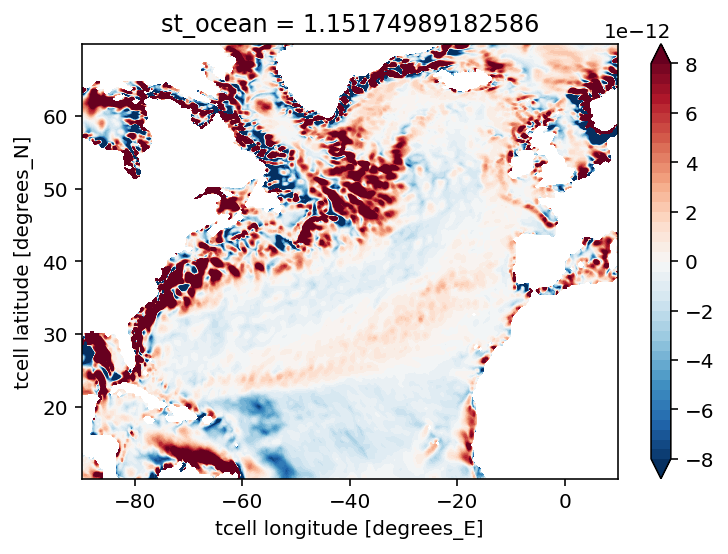

In [19]:
J_s.plot.contourf(levels = np.linspace(-8e-12,8e-12,41))